In [299]:
#Librerias necesarias para la exploracion de datos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np

In [300]:
#Cargo el archivo proporcionado por Vozy

df = pd.read_csv(r"src/Empresa X Info Septiembre 2023.csv", sep=";")

In [301]:
# exploro la informacion de las columnas y los tipos de datos que tiene

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28391 entries, 0 to 28390
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   session_id                 28391 non-null  object 
 1   date                       28391 non-null  object 
 2   hour                       28391 non-null  object 
 3   Contacted                  28391 non-null  bool   
 4   Answered                   28391 non-null  bool   
 5   contact_confirmed          28391 non-null  bool   
 6   contactability_type        2326 non-null   object 
 7   engagement                 28391 non-null  bool   
 8   Success                    28391 non-null  bool   
 9   success_type               339 non-null    object 
 10  retention                  28391 non-null  bool   
 11  recall                     28391 non-null  bool   
 12  recall_type                100 non-null    object 
 13  call_fallback              28391 non-null  boo

In [302]:
# Elimino las columnas que no tengan ningun tipo de registro

df = df.dropna(axis=1, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28391 entries, 0 to 28390
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   session_id                28391 non-null  object 
 1   date                      28391 non-null  object 
 2   hour                      28391 non-null  object 
 3   Contacted                 28391 non-null  bool   
 4   Answered                  28391 non-null  bool   
 5   contact_confirmed         28391 non-null  bool   
 6   contactability_type       2326 non-null   object 
 7   engagement                28391 non-null  bool   
 8   Success                   28391 non-null  bool   
 9   success_type              339 non-null    object 
 10  retention                 28391 non-null  bool   
 11  recall                    28391 non-null  bool   
 12  recall_type               100 non-null    object 
 13  call_fallback             28391 non-null  bool   
 14  fallba

In [303]:
# Veo si alguna columna solo tiene un tipo de valor. 

unique_value_counts = df.nunique()
unique_value_counts = unique_value_counts.sort_index()
unique_value_counts

Answered                        2
CampaignName                   14
Cantidad                     8503
Comentario no pago            122
Compromiso pago                 5
ContactID                   22358
Contacted                       2
Divisa                          1
Fecha máxima                  350
HangUPCause                     9
LastNode                       20
Límite días                     2
Phone                        8292
Producto                        1
Slot para buzones de voz      139
Success                         2
affirmations_contact            8
affirmations_pay                7
alreadypaid                     4
automatic_flow                  1
automatic_flow_start            1
call_fallback                   2
callorigin                      8
contact_confirmed               2
contactability_type             5
date                           15
dates                          41
denials_contact                 5
denials_pay                     8
duration      

In [304]:
# Hay columnas que no tienen valores nulos pero solo tienen un registro unico. Observo cual es, para ver si es reelevante.

automatic_flow = df["automatic_flow"].unique()
automatic_flow

array([False])

In [305]:
automatic_flow_start = df["automatic_flow_start"].unique()
automatic_flow_start

array([False])

In [306]:
voicemail = df["voicemail"].unique()
voicemail

array([nan, True], dtype=object)

In [307]:
Divisa = df["Divisa"].unique()
Divisa

array(['Dolares', nan], dtype=object)

In [308]:
Producto = df["Producto"].unique()
Producto

array(['Caaja Chiica', nan], dtype=object)

In [309]:
#Elimino las columnas que solo tiene un registro unico, o no aportan información reelevante para el analisis.

df_clean = df.drop(columns=["automatic_flow", 
                            "automatic_flow_start", 
                            "voicemail", 
                            "Divisa", 
                            "Producto", 
                            "engagement", 
                            "Success", 
                            "retention", 
                            "fallback_type", 
                            "call_fallback", 
                            "recall_type", 
                            "recall", 
                            "Slot para buzones de voz", 
                            "Comentario no pago", 
                            "in_schedule",
                            'denials_pay',
                            "get person",
                            "affirmations_contact",
                            "unavailable",
                            "affirmations_pay",
                            "family",
                            "numdate",
                            "imprecisemonth",
                            "alreadypaid",
                            "callorigin",
                            "repeat",
                            "denials_contact",
                            "Límite días",
                            "Fecha máxima",])

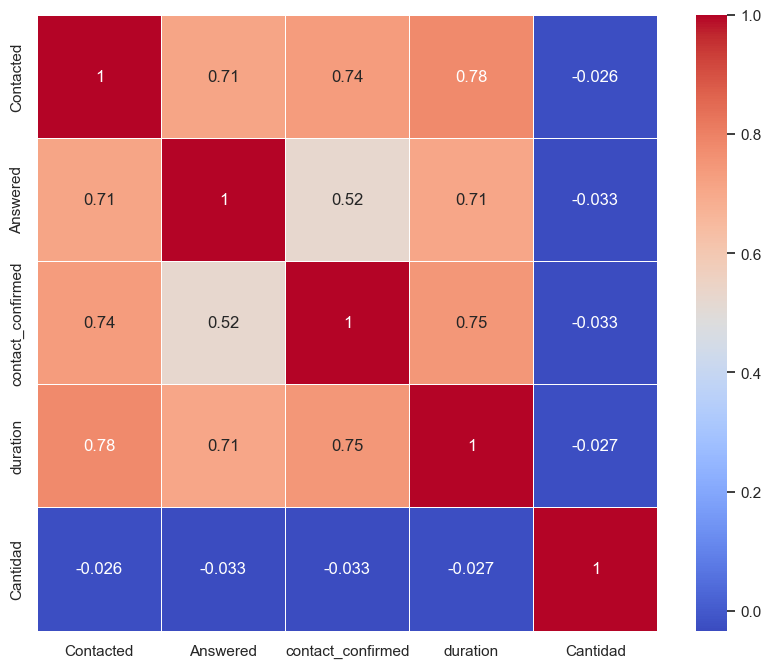

In [310]:
# Observo la correlación entre las variables numéricas y booleanas, con el fin de eliminar informacion redundante

numeric_columns = df_clean.select_dtypes(include=['int64', 'float64', 'bool'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.show()


In [312]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28391 entries, 0 to 28390
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           28391 non-null  object 
 1   date                 28391 non-null  object 
 2   hour                 28391 non-null  object 
 3   Contacted            28391 non-null  bool   
 4   Answered             28391 non-null  bool   
 5   contact_confirmed    28391 non-null  bool   
 6   contactability_type  2326 non-null   object 
 7   success_type         339 non-null    object 
 8   ContactID            28390 non-null  object 
 9   Phone                28391 non-null  object 
 10  HangUPCause          28380 non-null  object 
 11  LastNode             5286 non-null   object 
 12  CampaignName         28389 non-null  object 
 13  duration             28391 non-null  int64  
 14  Compromiso pago      720 non-null    object 
 15  recall.1             5 non-null     

In [342]:
df_clean.to_csv('data\df_powerbi.csv', sep=";", index=False)

In [341]:
df_clean.head()

,session_id,date,hour,Contacted,Answered,contact_confirmed,contactability_type,success_type,ContactID,Phone,HangUPCause,LastNode,CampaignName,duration,Compromiso pago,recall.1,dates,Cantidad,Attempts
0,sid-e8738ea4-c53e-4c92-a181-26b2b406f4b3-16961...,30/09/2023,3:12 PM,True,True,True,Contacto sí,NaN,bef6bf43-7c49-4197-9bf4-d0f04ffbfc70,50688371423,CALL_ENDED_PROPERLY,5_wont_pay,Cobro 3 - 15 30_09_23,97,No,NaN,NaN,29828.04,1
1,21354ec4-03b3-4cba-bbd1-d82ece1e4678,30/09/2023,3:11 PM,False,False,False,NaN,NaN,8c18142a-38f9-4e97-b373-014a5312b73b,50689827540,VOICEMAIL,NaN,Cobro 3 - 15 30_09_23,1,NaN,NaN,NaN,17119.84,1
2,sid-023d3a10-0178-4f59-9abc-8aa470c64f09-16961...,30/09/2023,3:11 PM,True,True,True,Contacto sí,NaN,bb1d1673-9bb2-4913-ac60-c6f4b54846f6,50660284090,USER_HANGUP,4_novalid_date,Cobro 3 - 15 30_09_23,66,No,NaN,NaN,2232.54,1
3,sid-6e3f8f3f-b66f-42ab-bb62-d161a294f442-16961...,30/09/2023,3:11 PM,True,True,True,Contacto sí,Compromiso pago,0f200b40-c67d-4186-bee8-5d2413eb466c,50685060916,USER_HANGUP,3_payment_yes_today,Cobro 3 - 15 30_09_23,56,Sí,NaN,hoy,2575.78,1
4,33129915-af8d-4aab-a5c9-3929e8ef6c7b,30/09/2023,3:10 PM,False,False,False,NaN,NaN,1564ada3-c16d-42d6-af67-475f331ef3ec,50662990578,VOICEMAIL,NaN,Cobro 3 - 15 30_09_23,1,NaN,NaN,NaN,12494.80,1


In [313]:
# compruebo si hay duplicados
duplicates = df_clean[df_clean.duplicated()]

print(duplicates)


Empty DataFrame
Columns: [session_id, date, hour, Contacted, Answered, contact_confirmed, contactability_type, success_type, ContactID, Phone, HangUPCause, LastNode, CampaignName, duration, Compromiso pago, recall.1, dates, Cantidad]
Index: []


In [343]:
df_clean.to_csv('data\df_clean.csv', sep=";", index=False)

Durante el análisis de los datos del mes de septiembre, identifiqué un total de acuerdos de pago que alcanzaron $10,285,458.98. Sin embargo, observo que había duplicados en los registros. Esto puede atribuirse a diversos factores, como la participación de un mismo usuario en varias campañas o el incumplimiento de plazos.

Para obtener resultados más precisos, eliminé los duplicados y se conservé únicamente las propuestas más recientes que pertenecían a la misma deuda, siempre y cuando el monto fuera idéntico.

Como resultado, obtuve que en septiembre se alcanzó un total de $9,541,661.72 en acuerdos de pago. Este monto supera el objetivo establecido por el cliente, que era de $8,000,000.

En cuanto al cumplimiento del objetivo, el mes fue exitoso, ya que éste fué superado en un 19.27%.
Sin embargo para afirmar esto con mas precisión, me gustaría realizar las siguientes comparaciones:

1. Evaluar si el desempeño de septiembre es consistente con la media de acuerdos de pago a lo largo del año.

2. Comparar los resultados con septiembres de años anteriores para determinar si la mejora es sostenible.

3. Analizar cómo se compara septiembre con los otros meses del año en términos de acuerdos de pago.

2. Cual es el valor promedio de acuerdos de pago por usuario único para el mes de septiembre?

Basado en el análisis de los datos de acuerdos de pago para el mes de septiembre, puedo observar que el valor promedio fue de 34696.95, mientras que la mediana, que representa el valor que divide a la muestra en dos mitades iguales, fué de 28392.0.

La mediana es una métrica que no se ve afectada por valores extremos (Outliers) y proporciona una representación más precisa del monto de la mayoría de los acuerdos de pago.

3. El cliente espera tener un 35% de contestación durante el mes de septiembre, según tu análisis cual fue el resultado de este ítem? Fue bueno o malo? y por que?

El resultado del porcentaje de contestación durante el mes de septiembre fue del 10.41%. Teniendo en cuenta el objetivo del cliente de alcanzar un 35%, este resultado puede considerarse malo.

Sin embargo este porcentaje se calcula con el número total de llamadas realizadas y las respuestas recibidas. Este cálculo puede no reflejar completamente la efectividad de las gestiones, ya que no tiene en cuenta el número de llamadas realizadas hasta lograr el contacto exitoso.

Como se puede observar en el gráfico, mas del 40% de usuarios, requirió ser llamado 3 veces para lograr la contactación.

Por este motivo consideré relevante también, evaluar el porcentaje por usuario único. Al hacerlo, obtuve una métrica que proporciona una visión más precisa de cuántos usuarios se contactaron exitosamente durante el mes de septiembre, lo que puede ser más representativo de la efectividad de las gestiones.

Por lo tanto, el porcentaje de contestación del 10.41% es bajo en comparación con el objetivo del 35%. 
Considerando la métrica alternativa, el porcentaje de contestación por usuario único fue de 27.53%. Creo que este dato da una imagen más completa de la efectividad de las llamadas.

4. De las llamadas contestadas se espera que al menos el 50% sean titulares, cuéntanos en el mes de septiembre, según tu análisis como estuvo este resultado?

En general, el porcentaje de llamadas contestadas fue del 55.09%. Considerando el campo "contactability_type" en el que, según el diccionario de datos, "Contacto Sí" confirma que se trata de un usuario titular.

Luego incluyo registros donde la titularidad se confirma a través de la columna "contact_confirmed," en este caso, se obtiene un resultado del 56.86%.

Continuando con el enfoque en el índice de contactabilidad, se procedió a eliminar las llamadas duplicadas que podrían distorsionar los datos. Esto se debe a que en las llamadas en las que el usuario no confirma ser titular o en las que atiende otra persona, es probable que se realicen nuevos intentos de llamada en futuras campañas. En este escenario, el porcentaje de contactación de titulares alcanza el 63.53%.

5. Según tu análisis, Cuales son las horas en las que mas se realizan llamadas, en las que mas se contestan llamadas y en las que hay mas efectividad?

Visualizando los datos, podemos observar que las horas en las que se realizan más llamadas son entre las 10 y las 11 a. m., alcanzando su punto máximo a las 11 a. m.

Las horas más efectivas en términos de respuesta y contactabilidad son de 13 a 15 horas. Sin embargo, la efectividad en la generación de compromisos de pago muestra su pico entre las 12 y las 13 horas.


6. Cuales son los dos días de la semana mas efectivos para realizar las gestiones?

Analizando los datos, podemos visualizar que los días más efectivos en términos de cantidad de llamadas contestadas, contactaciones, cantidad de acuerdos y monto de acuerdos son los martes y los miércoles.

7. Porcentualmente cuales son los motivos de cuelgue en las llamadas?

El porcentaje de los motivos de las finalizaciones de las llamadas del mes de septiembre es el siguiente:

- 34.39%: Scheduled - Llamado que no ha sido respondido y se agenda para un nuevo intento.
- 24.58%: Sent_to_Channel - Llamado sin responder.
- 22.34%: Voicemail - Finalización luego del ingreso al correo de voz.
- 10.99%: USER_HANGUP - Llamada finalizada por el usuario.
- 7.27%: CALL_ENDED_PROPERLY - Llamada finalizada correctamente.
- 0.43%: Otro.

8. Cuales son los nodos en los que están terminando las llamadas no exitosas, pero que son contestadas.

En el siguiente analisis, se identificaron los nodos en los que están terminando las llamadas no exitosas, pero que son contestadas.
Detallo los 3 con la tasa mas alta:

Nodo "5_wont_pay": En este nodo, un porcentaje significativo de llamadas no exitosas son contestadas. Los usuarios pueden estar expresando su negativa a realizar un pago.

Nodo "4_novalid_date": También se observa un número considerable de llamadas no exitosas que son contestadas en este nodo. La falta de una fecha válida podría estar contribuyendo a la falta de éxito en estas llamadas.

Nodo "3_payment_yes_today": Existe un grupo de llamadas no exitosas que se contestan en este nodo. Es posible que algunos usuarios estén manifestando su disposición a realizar un pago, pero no logran completar el acuerdo.